# Checkpoint Objective
In this checkpoint, we are going to work on the '**Expresso churn**' dataset that was provided as part of **Expresso Churn Prediction Challenge** hosted by [Zindi](https://zindi.africa/) platform.

Dataset description: Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

[➡️ Dataset link](https://drive.google.com/file/d/12_KUHr5NlHO_6bN5SylpkxWc-JvpJNWe/view?usp=sharing)

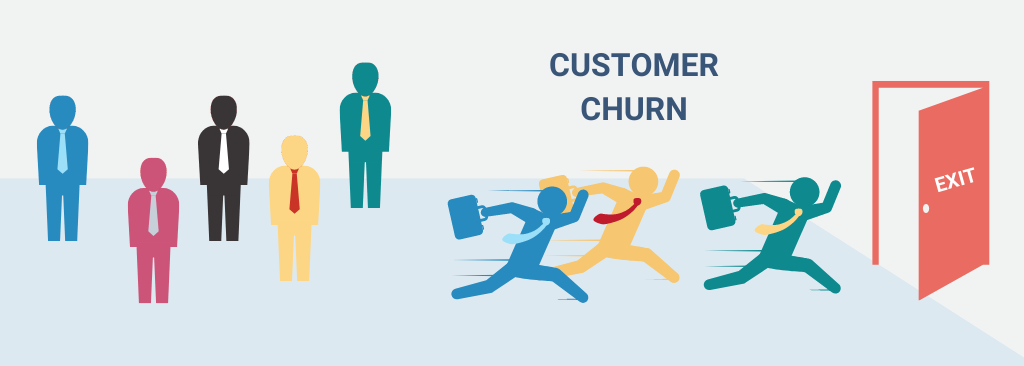

# Instructions
1. Install the necessary packages
2. Import you data and perform basic data exploration phase
    - Display general information about the dataset
    - Create a pandas profiling reports to gain insights into the dataset
    - Handle Missing and corrupted values
    - Remove duplicates, if they exist
    - Handle outliers, if they exist
    - Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally)
5. Add input fields for your features and a validation button at the end of the form
6. Import your ML model into the streamlit application and start making predictions given the provided features values

# Notes
1. This checkpoint should be done locally, (Google colab notebooks won't work)
2. Make sure to run the app using the "streamlit run" command in your terminal.

In [1]:
#!pip install ydata_profiling

In [2]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
def col_with_mv(data):
    null = 0
    missing_value_cols = []
    for col in data.columns:
        if data[col][data[col].isnull()].shape[0] != null:
            print(f'{col} : {data[col][data[col].isnull()].shape[0]} Missings Values')
            missing_value_cols.append(col)
    return missing_value_cols
        

In [21]:
def data_prep(data):
    encoder = LabelEncoder()
    obj_col = []
    for col in data.columns:
        if data[col].isnull().sum() != 0:
            mode = data[col].mode()[0]
            data[col].fillna(mode, inplace=True)
        if data[col].dtypes == 'object':
            obj_col.append(col)
            data[col] = encoder.fit_transform(data[col])
    return obj_col

In [39]:
expresso_clients = pd.read_csv(r"C:\\Users\DIEDHIOUSenyToutou\\PycharmProjects\\pythonProject\StreamlitProject\\Expresso_churn_dataset.csv")
df = expresso_clients.copy()

In [6]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [7]:
display(df.isnull().sum(), df.shape)

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

(2154048, 19)

In [8]:
# Recherches de doublons
df[df.duplicated()]

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN


In [9]:
#profile = ProfileReport(df, title="Expresso_profiling")
#profile.to_file(r"C:\Users\DIEDHIOUSenyToutou\PycharmProjects\pythonProject\StreamlitProject\Expresso_churn_dataset.html")

In [10]:
cols_with_missing_values = col_with_mv(df)

REGION : 849299 Missings Values
MONTANT : 756739 Missings Values
FREQUENCE_RECH : 756739 Missings Values
REVENUE : 726048 Missings Values
ARPU_SEGMENT : 726048 Missings Values
FREQUENCE : 726048 Missings Values
DATA_VOLUME : 1060433 Missings Values
ON_NET : 786675 Missings Values
ORANGE : 895248 Missings Values
TIGO : 1290016 Missings Values
ZONE1 : 1984327 Missings Values
ZONE2 : 2017224 Missings Values
TOP_PACK : 902594 Missings Values
FREQ_TOP_PACK : 902594 Missings Values


In [11]:
# `data_nan` est le DataFrame ou toutes les colonnes de `cols_with_missing_values` ont des NaN
data_nan = df[df[cols_with_missing_values].isnull().all(axis=1)]
data_nan.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
17,0000a45ed15492427df603217166f1f813a2cc83,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
22,0000b4af921db374095a9e7ab87ee314522e4fe4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
35,00012873b0a82e81b3155431769fa5ac0a8ac267,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
51,0001b56565732f8d0291ccac6c9d6d8ff10695b8,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
52,0001b59420394aa028655cfecc56a157671c2b8d,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
54,0001c6f26a2b2a44835e332328b300875e7ff243,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
55,0001d0e22dcc7cb633db992322064df7f78e648f,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
64,00021339dffe3c38af6d3158d4c3cd4dcfcf1fc5,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1


-----
---
---

In [40]:
merge_df = pd.merge(df, data_nan, on='user_id', how='outer', indicator=True)
non_common_data = merge_df[merge_df['_merge'] != 'both']

In [13]:
display(merge_df.head(10), non_common_data.head(10))

,user_id,REGION_x,TENURE_x,MONTANT_x,FREQUENCE_RECH_x,REVENUE_x,ARPU_SEGMENT_x,FREQUENCE_x,DATA_VOLUME_x,ON_NET_x,...,ORANGE_y,TIGO_y,ZONE1_y,ZONE2_y,MRG_y,REGULARITY_y,TOP_PACK_y,FREQ_TOP_PACK_y,CHURN_y,_merge
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN,1.0,both
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


,user_id,REGION_x,TENURE_x,MONTANT_x,FREQUENCE_RECH_x,REVENUE_x,ARPU_SEGMENT_x,FREQUENCE_x,DATA_VOLUME_x,ON_NET_x,...,ORANGE_y,TIGO_y,ZONE1_y,ZONE2_y,MRG_y,REGULARITY_y,TOP_PACK_y,FREQ_TOP_PACK_y,CHURN_y,_merge
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
10,0000527d276a6ba8b02810cc2c1d60d25e650f5f,DAKAR,K > 24 month,200.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [41]:
non_common_data = non_common_data.drop(['user_id', 'REGION_y', 'TENURE_y', 'MONTANT_y', 'FREQUENCE_RECH_y', 'REVENUE_y', 'ARPU_SEGMENT_y', 'FREQUENCE_y', 'DATA_VOLUME_y', 'ON_NET_y', 'ORANGE_y', 'TIGO_y', 'ZONE1_y', 'ZONE2_y', 'MRG_y', 'REGULARITY_y', 'TOP_PACK_y', 'FREQ_TOP_PACK_y', 'CHURN_y','_merge'], axis=1)

In [42]:
old_col_names = ['REGION_x', 'TENURE_x', 'MONTANT_x', 'FREQUENCE_RECH_x', 'REVENUE_x', 'ARPU_SEGMENT_x', 'FREQUENCE_x', 'DATA_VOLUME_x', 'ON_NET_x', 'ORANGE_x', 'TIGO_x', 'ZONE1_x', 'ZONE2_x', 'MRG_x', 'REGULARITY_x', 'TOP_PACK_x', 'FREQ_TOP_PACK_x', 'CHURN_x']
new_col_names =  ['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

dico_names = {}
for col1, col2 in zip (old_col_names, new_col_names):
    dico_names.update({col1 : col2})
df = non_common_data.rename(columns=dico_names)


In [43]:
df

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
2,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154040,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,0.0,57.0,1.0,NaN,2.0,NaN,NO,21,All-net 500F=2000F;5d,2.0,0
2154042,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,7400.0,2.0,12.0,NaN,NaN,0.0,NO,62,"Data:1000F=2GB,30d",3.0,0
2154044,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154046,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [17]:
#ProfileReport(df,title='data 2').to_file('Expresso.html')

In [18]:
new_cols_with_missing_values = col_with_mv(df)

REGION : 431436 Missings Values
MONTANT : 338876 Missings Values
FREQUENCE_RECH : 338876 Missings Values
REVENUE : 308185 Missings Values
ARPU_SEGMENT : 308185 Missings Values
FREQUENCE : 308185 Missings Values
DATA_VOLUME : 642570 Missings Values
ON_NET : 368812 Missings Values
ORANGE : 477385 Missings Values
TIGO : 872153 Missings Values
ZONE1 : 1566464 Missings Values
ZONE2 : 1599361 Missings Values
TOP_PACK : 484731 Missings Values
FREQ_TOP_PACK : 484731 Missings Values


# Explication du Prétraitement
Dans le dataset initial, on remarque que 20% des données de ce dataset contiennent des lignes où les cellules des colonnes se trouvant dans la liste `cols_with_missing_values` ( '**REGION**',
 '**MONTANT**',
 '**FREQUENCE_RECH**',
 '**REVENUE**',
 '**ARPU_SEGMENT**',
 '**FREQUENCE**',
 '**DATA_VOLUME**',
 '**ON_NET**',
 '**ORANGE**',
 '**TIGO**',
 '**ZONE1**',
 '**ZONE2**',
 '**TOP_PACK**',
 '**FREQ_TOP_PACK**') ont toutes des valeurs **NaN**. On peut dire ainsi que 20% du dataset est vide, et donc à supprimer. Ce qui nous permet de créer un nouveau dataset df constitué uniquement des 80% des données restantes.
 
 - Les donnees liees aux zones ne sont pas aussi pertinant5 puisque 90% des donnees de ces deux colonnes sont vides. 

In [19]:
zones = ['ZONE1', 'ZONE2']
df_01 = df.drop(zones, axis=1)

In [38]:
# Desormais `df_01` est le dataframe sur lequel on doit traivailler
object_col, le = data_prep(df_01)

In [24]:
df_01 = df_01[~df_01.duplicated()]
df_01.to_csv('ExpressoClientChum_clean_dataset.csv')
display(df_01.head(19),df_01.shape)

# Machine Learning
A ce niveau le dataset **df_01** est pres pour le Machine Learning

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score, f1_score, r2_score
from sklearn.model_selection import train_test_split

In [26]:
#ProfileReport(df_01,title='data 2').to_file('Expresso_df_01.html')

In [27]:
sgd = SGDClassifier()

X = df_01.drop('CHURN', axis=1)
y = df_01['CHURN']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)

In [28]:
sgd.fit(X_train, y_train)
y_sgd_pred = sgd.predict(X_test)
accuracy_score(y_test,y_sgd_pred)

0.9391911540932607

In [29]:
confusion_matrix(y_test,y_sgd_pred)

array([[277429,   1387],
       [ 16596,    318]], dtype=int64)

# Sauvegarder le modele

In [ ]:
from joblib import dump

dump(sgd, "C:\\Users\DIEDHIOUSenyToutou\\PycharmProjects\\pythonProject\StreamlitProject\\mon_modele_001.joblib")

['C:\\Users\\DIEDHIOUSenyToutou\\PycharmProjects\\pythonProject\\StreamlitProject\\mon_modele_001.joblib']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1478648 entries, 0 to 2154046
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          1478648 non-null  int32  
 1   TENURE          1478648 non-null  int32  
 2   MONTANT         1478648 non-null  float64
 3   FREQUENCE_RECH  1478648 non-null  float64
 4   REVENUE         1478648 non-null  float64
 5   ARPU_SEGMENT    1478648 non-null  float64
 6   FREQUENCE       1478648 non-null  float64
 7   DATA_VOLUME     1478648 non-null  float64
 8   ON_NET          1478648 non-null  float64
 9   ORANGE          1478648 non-null  float64
 10  TIGO            1478648 non-null  float64
 11  MRG             1478648 non-null  int32  
 12  REGULARITY      1478648 non-null  int64  
 13  TOP_PACK        1478648 non-null  int32  
 14  FREQ_TOP_PACK   1478648 non-null  float64
dtypes: float64(10), int32(4), int64(1)
memory usage: 157.9 MB


In [ ]:
for col in X.columns:
    display(df_01[col].value_counts())

REGION
0     783814
12    158305
9     108375
7      85904
4      83945
1      55295
11     49940
3      38582
6      34815
2      31216
8      25741
13     19071
10      2742
5        903
Name: count, dtype: int64

TENURE
7    1406260
5      28908
4      16711
3       9191
6       8695
2       6586
1       1602
0        695
Name: count, dtype: int64

MONTANT
500.0       210921
1000.0       81929
1500.0       48671
2000.0       46081
3000.0       34792
             ...  
24911.0          1
5740.0           1
19155.0          1
2594.0           1
145500.0         1
Name: count, Length: 6540, dtype: int64

FREQUENCE_RECH
1.0      301509
2.0      139228
3.0      110481
4.0       88885
5.0       74527
          ...  
119.0         1
118.0         1
132.0         1
122.0         1
121.0         1
Name: count, Length: 123, dtype: int64

REVENUE
500.0       133278
1000.0       36069
1500.0       20728
2000.0       18212
200.0        18187
             ...  
23283.0          1
75486.0          1
58250.0          1
25277.0          1
145917.0         1
Name: count, Length: 38114, dtype: int64

ARPU_SEGMENT
167.0      142136
333.0       43459
500.0       28554
667.0       22890
67.0        20840
            ...  
16199.0         1
15124.0         1
12277.0         1
22031.0         1
48639.0         1
Name: count, Length: 16535, dtype: int64

FREQUENCE
1.0     215147
2.0     114141
3.0      94998
4.0      82132
5.0      71833
         ...  
87.0       214
88.0       165
89.0       126
90.0        84
91.0        83
Name: count, Length: 91, dtype: int64

DATA_VOLUME
0.0        726084
1.0         35343
2.0         11533
3.0          6472
4.0          4995
            ...  
26790.0         1
38558.0         1
57227.0         1
66186.0         1
33187.0         1
Name: count, Length: 41550, dtype: int64

ON_NET
0.0        262518
1.0         81817
2.0         54025
3.0         39329
4.0         35506
            ...  
20295.0         1
6104.0          1
6592.0          1
12765.0         1
7086.0          1
Name: count, Length: 9884, dtype: int64

ORANGE
1.0       296950
0.0        59933
2.0        48119
3.0        35737
4.0        32608
           ...  
3658.0         1
3386.0         1
4105.0         1
4180.0         1
2826.0         1
Name: count, Length: 3167, dtype: int64

TIGO
1.0       727655
0.0        93925
2.0        72378
3.0        52932
4.0        42887
           ...  
2306.0         1
2576.0         1
1173.0         1
1502.0         1
1267.0         1
Name: count, Length: 1315, dtype: int64

MRG
0    1478648
Name: count, dtype: int64

REGULARITY
62    165487
61     63921
60     47041
59     39385
58     34248
       ...  
36     17795
31     17665
3      17590
2      16394
1      15057
Name: count, Length: 62, dtype: int64

TOP_PACK
18     547082
107    152135
44     115026
30      84354
100     67434
        ...  
24          1
133         1
117         1
137         1
114         1
Name: count, Length: 140, dtype: int64

FREQ_TOP_PACK
1.0      479357
2.0      155198
3.0      116418
4.0       85537
5.0       68513
          ...  
171.0         1
238.0         1
239.0         1
179.0         1
259.0         1
Name: count, Length: 245, dtype: int64

In [37]:
def data_prep(data):
    encoder = LabelEncoder()
    obj_col = []
    for col in data.columns:
        if data[col].isnull().sum() != 0:
            mode = data[col].mode()[0]
            data[col].fillna(mode, inplace=True)
        if data[col].dtypes == 'object':
            obj_col.append(col)
            data[col] = encoder.fit_transform(data[col])
            display(list(encoder.inverse_transform(data[col].values)))
    return obj_col

In [44]:
data_prep(df_01)

([], LabelEncoder())